# Import packages

In [4]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break
    
from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result, find_tuning_curves, raster_plot, trial_aligned_tuning_curves
from neural_data_analysis.neural_analysis_tools.test_neural_response import compare_firing_rate
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class, pn_aligned_by_seg, pn_aligned_by_event
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils, ml_methods_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_utils
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, plot_gpfa_utils, gpfa_helper_class
from neural_data_analysis.neural_analysis_tools.align_trials import time_resolved_regression, time_resolved_gpfa_regression,plot_time_resolved_regression

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca
import quantities as pq

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

Set up logging configuration.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# exp

In [9]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312"

In [10]:
pn.retrieve_neural_data(binned_spikes_df_exists_ok=True)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv


# retrieve data

In [2]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0321"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0329"

In [ ]:
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0327"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

In [5]:
reduce_y_var_lags = False
planning_data_by_point_exists_ok = True
y_data_exists_ok = False

pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok,
                                 add_behav_data=False,
                                 put_data_into_bins=False)
pn.load_raw_data()
pn.spikes_df = neural_data_processing.make_spikes_df(pn.raw_data_folder_path, pn.ff_caught_T_sorted, sampling_rate=pn.sampling_rate)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


In [4]:
#event_df = pn.get_new_ff_first_or_last_time(cur_or_nxt='cur', first_or_last='first', time_limit_to_count_sighting=2)          
pn.get_new_seg_info(cur_or_nxt='cur', first_or_last='first', time_limit_to_count_sighting=2, pre_event_window=0.25, post_event_window=0.75, exists_ok=False)

new_seg_duration is now 1.0, and post_event_window is now 0.75
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0416/ff_dataframe.h5
Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
Made new new_seg_info and saved to all_monkey_data/planning_and_neural/monkey_Schro/data_0416/new_seg_info/tlim2_cur_first_pre0p25_post0p75.csv


,event_time,segment,stop_time,prev_ff_caught_time,new_segment,new_seg_start_time,new_seg_end_time,new_seg_duration
0,23.01927,0,25.01125,17.07656,0,22.76927,23.76927,1.00000
1,27.50133,1,29.41040,25.01125,1,27.25133,28.25133,1.00000
2,30.42273,2,31.90023,29.41040,2,30.17273,31.17273,1.00000
3,49.49614,3,50.94039,48.50003,3,49.24614,50.24614,1.00000
4,56.53438,5,56.98268,51.57103,4,56.28438,57.28438,1.00000
...,...,...,...,...,...,...,...,...
121,2283.94837,145,2285.25989,2282.38800,121,2283.69837,2284.69837,1.00000
122,2290.05707,147,2292.04920,2289.19398,122,2289.80707,2290.80707,1.00000
123,2293.37713,148,2294.55570,2292.04920,123,2293.12713,2294.12713,1.00000
124,2316.31797,150,2316.74978,2310.04345,124,2316.06797,2317.06797,1.00000


In [ ]:
stop!

# raster + fr

## both

In [20]:
# distribute data into new_segments and add rel_spike_time
pn.get_new_seg_info(cur_or_nxt='nxt', first_or_last='first', time_limit_to_count_sighting=2, pre_event_window=0.75, post_event_window=0.75, exists_ok=False)

new_seg_info2 = pn.new_seg_info.copy()
new_seg_info2['new_seg_start_time'] = new_seg_info2['event_time'] - 1
new_seg_info2['new_seg_end_time'] = new_seg_info2['stop_time']
aligned_spike_trains = raster_plot.prepare_aligned_spike_trains(new_seg_info2, pn.spikes_df)

new_seg_duration is now 1.5, and post_event_window is now 0.75
Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
Made new new_seg_info and saved to all_monkey_data/planning_and_neural/monkey_Schro/data_0416/new_seg_info/tlim2_nxt_first_pre0p75_post0p75.csv
Dropped 55 rows out of 126 due to NA in new_seg_start_time or new_seg_end_time, which is 43.65% of the original data


In [22]:
aligned_spike_trains

,spike_time,cluster,new_segment,new_seg_start_time,new_seg_end_time,new_seg_duration,event_time,stop_time,prev_ff_caught_time,reference_time,rel_new_seg_start_time,rel_new_seg_end_time,rel_spike_time,rel_prev_ff_caught_time,rel_stop_time,rel_event_time
0,23.71876,58,0,23.71247,25.01125,1.29878,24.71247,25.01125,17.07656,24.71247,-1.00000,0.29878,-0.99371,-7.63591,0.29878,0.00000
1,23.71980,30,0,23.71247,25.01125,1.29878,24.71247,25.01125,17.07656,24.71247,-1.00000,0.29878,-0.99268,-7.63591,0.29878,0.00000
2,23.72223,23,0,23.71247,25.01125,1.29878,24.71247,25.01125,17.07656,24.71247,-1.00000,0.29878,-0.99024,-7.63591,0.29878,0.00000
3,23.72303,50,0,23.71247,25.01125,1.29878,24.71247,25.01125,17.07656,24.71247,-1.00000,0.29878,-0.98944,-7.63591,0.29878,0.00000
4,23.72566,67,0,23.71247,25.01125,1.29878,24.71247,25.01125,17.07656,24.71247,-1.00000,0.29878,-0.98681,-7.63591,0.29878,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84558,2316.74790,6,124,2315.33466,2316.74978,1.41512,2316.33466,2316.74978,2310.04345,2316.33466,-1.00000,0.41512,0.41324,-6.29121,0.41512,0.00000
84559,2316.74810,6,124,2315.33466,2316.74978,1.41512,2316.33466,2316.74978,2310.04345,2316.33466,-1.00000,0.41512,0.41344,-6.29121,0.41512,0.00000
84560,2316.74936,47,124,2315.33466,2316.74978,1.41512,2316.33466,2316.74978,2310.04345,2316.33466,-1.00000,0.41512,0.41470,-6.29121,0.41512,0.00000
84561,2316.74943,7,124,2315.33466,2316.74978,1.41512,2316.33466,2316.74978,2310.04345,2316.33466,-1.00000,0.41512,0.41477,-6.29121,0.41512,0.00000


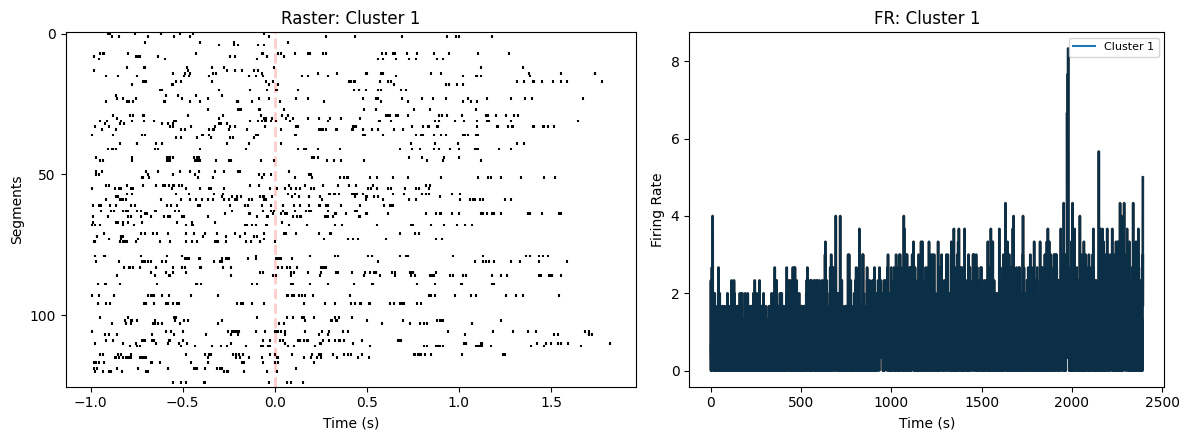

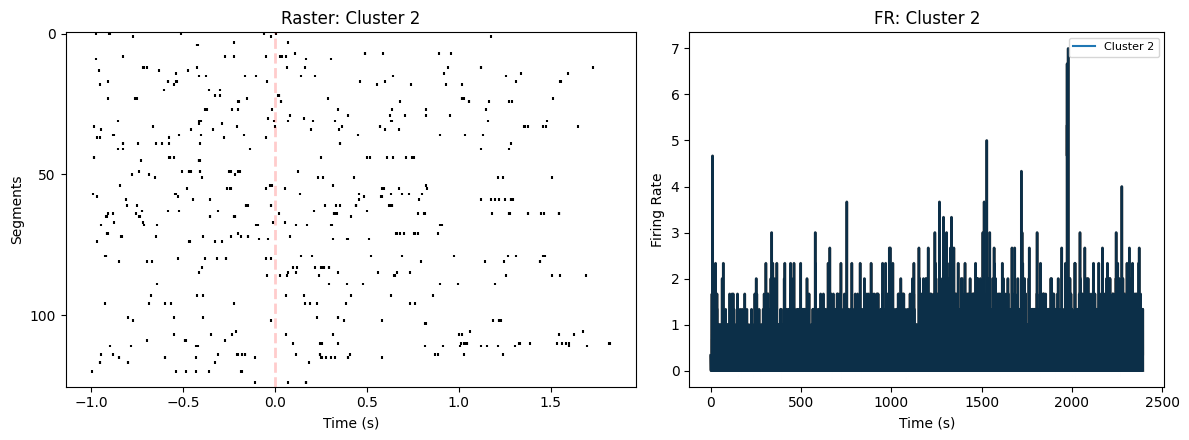

KeyboardInterrupt: 

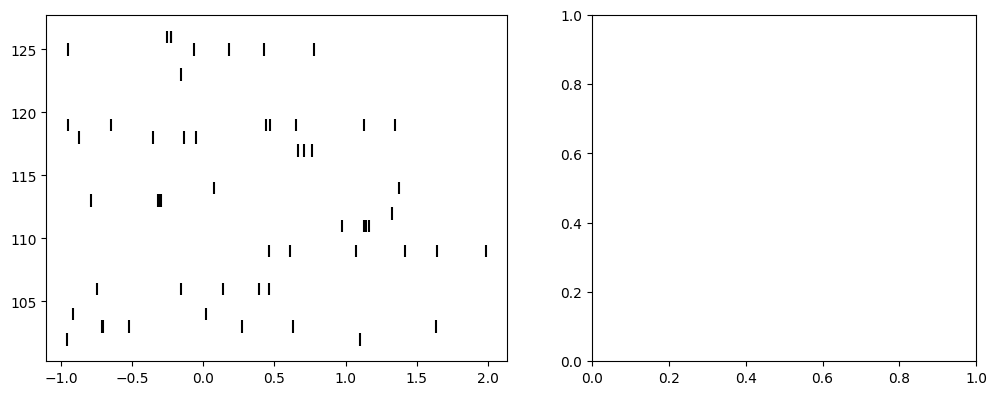

In [ ]:
aligned_spike_trains = raster_plot.add_relative_times(aligned_spike_trains, reference_time_col='event_time')
aligned_spike_trains = raster_plot.add_scaling_info(aligned_spike_trains, scale_anchor_col='event_time',
                                                    scale_factor_upper_col='stop_time',
                                                    scale_factor_lower_col='scale_anchor')

raster_plot.plot_rasters_and_fr(
    aligned_spike_trains, new_seg_info2, pn.binned_spikes_df, pn.bin_width,
    cluster_col='cluster',
    bins_per_aggregate=300, plot_mean=True,
    max_clusters_to_plot=None, max_segments_to_plot=None,
    max_time=None
)

## plot rastors only

In [18]:
# distribute data into new_segments and add rel_spike_time
pn.get_new_seg_info(cur_or_nxt='nxt', first_or_last='first', time_limit_to_count_sighting=2, pre_event_window=0.75, post_event_window=0.75, exists_ok=False)

new_seg_info2 = pn.new_seg_info.copy()
new_seg_info2['new_seg_start_time'] = new_seg_info2['event_time'] - 1
new_seg_info2['new_seg_end_time'] = new_seg_info2['stop_time']
aligned_spike_trains = raster_plot.prepare_aligned_spike_trains(new_seg_info2, pn.spikes_df)


new_seg_duration is now 1.5, and post_event_window is now 0.75
Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
Made new new_seg_info and saved to all_monkey_data/planning_and_neural/monkey_Schro/data_0416/new_seg_info/tlim2_nxt_first_pre0p75_post0p75.csv
Dropped 55 rows out of 126 due to NA in new_seg_start_time or new_seg_end_time, which is 43.65% of the original data


In [19]:
aligned_spike_trains = raster_plot.add_relative_times(aligned_spike_trains, reference_time_col='event_time')
aligned_spike_trains = raster_plot.add_scaling_info(aligned_spike_trains, scale_anchor_col='event_time',
                                                    scale_factor_upper_col='stop_time',
                                                    scale_factor_lower_col='scale_anchor')

raster_plot.plot_rasters(aligned_spike_trains, 
                         max_clusters_to_plot=None,
                         scale_spike_times=True,
                         col_to_rearrange_segments='rel_stop_time',
                         xmin=-0.5,
                        events_to_plot=['rel_event_time', 'rel_stop_time', 
                                        #'rel_prev_ff_caught_time',
                                        #'rel_new_seg_start_time', 'rel_new_seg_end_time'
                                        ])

KeyError: 'scale_anchor'

## plot fr only

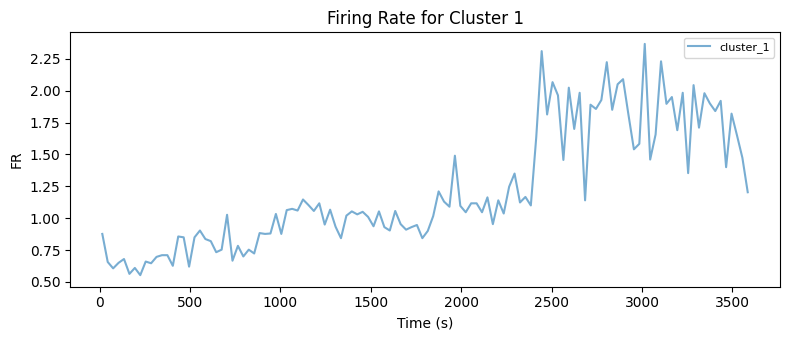

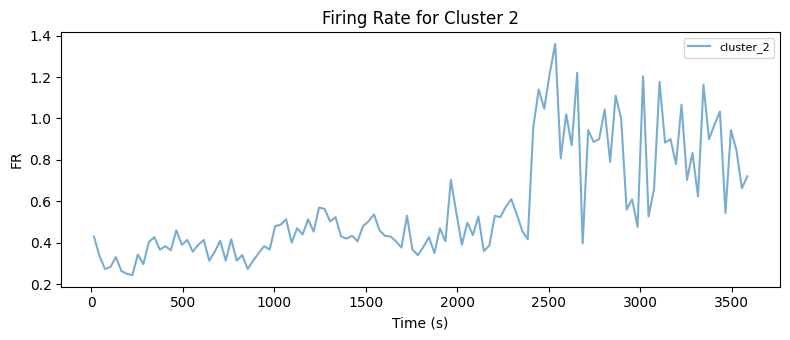

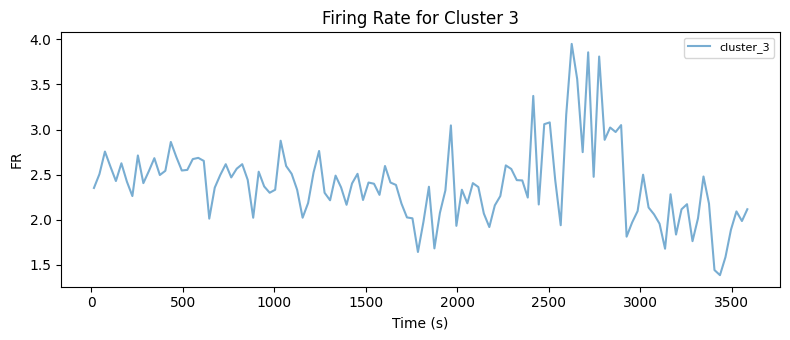

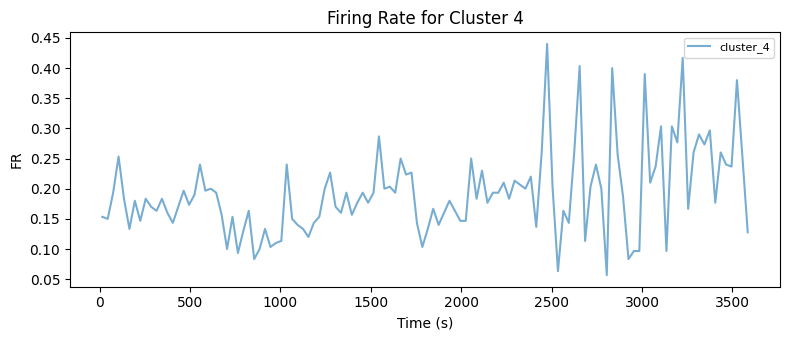

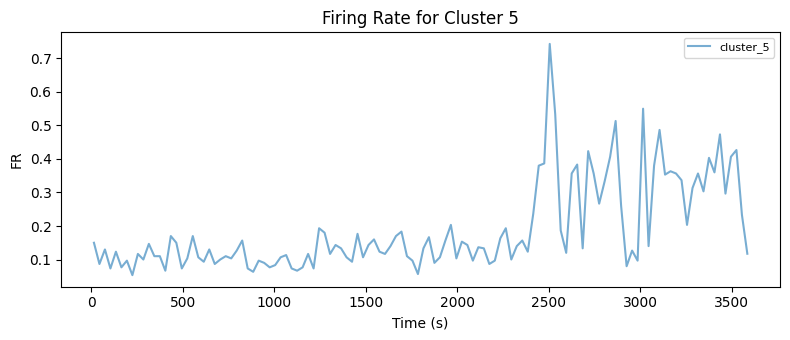

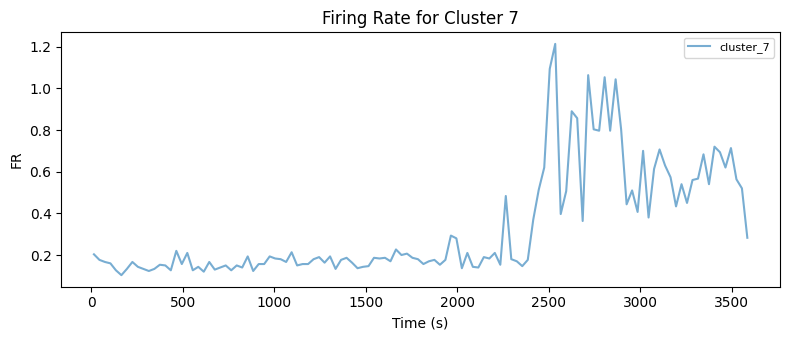

KeyboardInterrupt: 

In [30]:
# one neural cluster per plot 
plot_neural_data.plot_fr_over_time(pn.binned_spikes_df, pn.bin_width, max_time=pn.ff_caught_T_new[-1], bins_per_aggregate=300, plot_mean=False, num_clusters_per_plot=1)

## overall fr

In [11]:
# check num_total_spikes / total_duration
time = pn.binned_spikes_df['bin'].max() * pn.bin_width
pn.binned_spikes_df.sum(axis=0)/ time

cluster_0         9.99645
cluster_1        13.51727
cluster_2         6.47515
cluster_3        22.83597
cluster_4         1.92965
cluster_5         2.23867
cluster_6         7.59103
cluster_7         3.70705
cluster_8         7.04183
cluster_9         5.76851
cluster_10       13.69429
cluster_11       13.02950
cluster_12       16.45634
cluster_13        2.47252
cluster_14       17.48111
cluster_15        7.00189
cluster_16        6.04047
cluster_17        9.95776
cluster_18       15.16094
cluster_19        8.91762
cluster_20       10.16368
cluster_21        6.16882
cluster_22        7.89400
cluster_23       11.46886
cluster_24       10.31919
cluster_25        3.44037
cluster_26        4.49020
cluster_27        5.33911
cluster_28        9.04098
cluster_29        0.68658
cluster_30        6.67924
cluster_31        3.51343
cluster_32       14.02941
cluster_33        2.20862
cluster_34       19.22530
cluster_35        2.89770
cluster_36        1.92389
cluster_37        4.62114
cluster_38  

<Axes: ylabel='Count'>

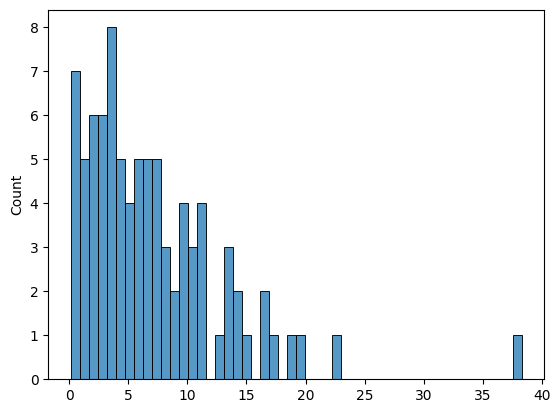

In [12]:
# histplot of num_total_spikes / total_duration
time = pn.binned_spikes_df['bin'].max() * pn.bin_width
rates = pn.binned_spikes_df.sum(axis=0)/ time
rates = rates.iloc[:-1]
sns.histplot(rates.values, bins=50)

# compare fr

In [13]:
# distribute data into new_segments and add rel_spike_time
pn.get_new_seg_info(cur_or_nxt='nxt', first_or_last='first', time_limit_to_count_sighting=2, pre_event_window=0.75, post_event_window=0.75, exists_ok=False)

new_seg_duration is now 1.5, and post_event_window is now 0.75
Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
Made new new_seg_info and saved to all_monkey_data/planning_and_neural/monkey_Schro/data_0416/new_seg_info/tlim2_nxt_first_pre0p75_post0p75.csv


,event_time,segment,stop_time,prev_ff_caught_time,new_segment,new_seg_start_time,new_seg_end_time,new_seg_duration
0,24.71247,0,25.01125,17.07656,0,23.96247,25.46247,1.50000
1,28.08220,1,29.41040,25.01125,1,27.33220,28.83220,1.50000
2,NaN,2,31.90023,29.41040,2,NaN,NaN,1.50000
3,50.85713,3,50.94039,48.50003,3,50.10713,51.60713,1.50000
4,56.88289,5,56.98268,51.57103,4,56.13289,57.63289,1.50000
...,...,...,...,...,...,...,...,...
121,NaN,145,2285.25989,2282.38800,121,NaN,NaN,1.50000
122,NaN,147,2292.04920,2289.19398,122,NaN,NaN,1.50000
123,NaN,148,2294.55570,2292.04920,123,NaN,NaN,1.50000
124,2316.33466,150,2316.74978,2310.04345,124,2315.58466,2317.08466,1.50000


In [14]:
time_before_event = 0.9
time_after_event = 0.9
n_bins = 6

new_seg_info2 = pn.new_seg_info.copy()
new_seg_info2['new_seg_start_time'] = new_seg_info2['event_time'] - time_before_event
new_seg_info2['new_seg_end_time'] = new_seg_info2['event_time'] + time_after_event
aligned_spike_trains = raster_plot.prepare_aligned_spike_trains(new_seg_info2, pn.spikes_df)

aligned_spike_trains = raster_plot.add_relative_times(aligned_spike_trains, reference_time_col='event_time')


Dropped 55 rows out of 126 due to NA in new_seg_start_time or new_seg_end_time, which is 43.65% of the original data


In [15]:
result_df = compare_firing_rate.compare_baseline_vs_post_event_from_spikes(
    aligned_spike_trains,
    pre_window=(-0.3, 0.0),
    post_window=(0.0, 0.3),
    method='wilcoxon'
)
result_df.head(10)

/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,cluster_id,mean_pre,mean_post,mean_diff,p_value,n_trials,p_corrected,significant
0,72,13.45029,19.59064,6.14035,0.00799,57,0.36360,False
1,11,17.31183,24.56989,7.25806,0.01721,62,0.36360,False
2,54,7.46032,4.76190,-2.69841,0.02403,21,0.36360,False
3,66,7.05128,5.12821,-1.92308,0.03131,26,0.36360,False
4,16,6.55172,9.19540,2.64368,0.03514,29,0.36360,False
5,75,15.00000,10.83333,-4.16667,0.03566,52,0.36360,False
6,48,9.52381,6.66667,-2.85714,0.03593,14,0.36360,False
7,50,21.56863,26.33987,4.77124,0.03980,51,0.36360,False
8,83,7.87879,3.63636,-4.24242,0.04217,11,0.36360,False
9,23,16.46766,19.10448,2.63682,0.04489,67,0.36360,False


In [16]:
clusters = [11, 17, 19, 21, 50, 54]
result_df[result_df['cluster_id'].isin(clusters)]

,cluster_id,mean_pre,mean_post,mean_diff,p_value,n_trials,p_corrected,significant
1,11,17.31183,24.56989,7.25806,0.01721,62,0.36360,False
2,54,7.46032,4.76190,-2.69841,0.02403,21,0.36360,False
7,50,21.56863,26.33987,4.77124,0.03980,51,0.36360,False
10,21,13.76344,8.92473,-4.83871,0.05122,31,0.37718,False
14,19,8.97959,11.63265,2.65306,0.10085,49,0.54457,False
32,17,14.56790,12.22222,-2.34568,0.33763,27,0.82873,False
